In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Listing 4
d = load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
y = pd.Series(d['target'])
X = df[['LSTAT', 'AGE', 'RAD', 'NOX']]

X100 = X[100:200]

linear_model = LinearRegression()
linear_model.fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

LinearRegression()

In [2]:
print(linear_model.predict(X.iloc[0:1]))
import shap
explainer = shap.Explainer(linear_model, X100)
shap_values = explainer(X.iloc[0:1])
shap_values

[30.44394072]


.values =
array([[ 7.80921425, -0.73084402,  0.12905011,  0.23758952]])

.base_values =
array([22.99893087])

.data =
array([[ 4.98 , 65.2  ,  1.   ,  0.538]])

In [3]:
#!pip install shap
import shap
explainer_1 = shap.Explainer(linear_model.predict, X100)
shap_values_1 = explainer_1(X.iloc[0:1])
shap_values_1

.values =
array([[ 7.80921425, -0.73084402,  0.12905011,  0.23758952]])

.base_values =
array([22.99893087])

.data =
array([[ 4.98 , 65.2  ,  1.   ,  0.538]])

In [4]:
explainer.expected_value

22.99893086682784

In [5]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [6]:
d = load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
X = df[['AGE', 'RAD', 'TAX', 'DIS', 'RM', 'LSTAT', 'B', 'INDUS', 
   'CHAS']]
y = pd.Series(d['target'])
rf_model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(X, y)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [7]:
X_train = X.iloc[:100].copy()
data_to_explain = X.iloc[470:471].copy()

In [8]:
import shap
explainer = shap.KernelExplainer(rf_model.predict, X_train)
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value
print(phi0)
print(k_shap_values)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

22.742007259290904
[[ 0.0413686  -0.04788727 -0.39765889  0.09282999 -0.8888258  -2.86457421
   0.21919233 -0.11143531  0.        ]]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [9]:
explainer = shap.KernelExplainer(rf_model, X_train)
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value
print(phi0)
print(k_shap_values)

Provided model function fails when applied to the provided data set.


TypeError: 'RandomForestRegressor' object is not callable

In [12]:
explainer = shap.KernelExplainer(rf_model.predict, shap.sample(X, 
   300))
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value
print(phi0)
print(k_shap_values)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


23.098187750077585
[[ 9.19365453e-02 -2.07472918e-01 -4.60284116e-01  8.01339147e-01
  -1.92510711e+00 -2.75760062e+00  2.45751853e-01 -1.01562577e-01
  -1.71269841e-04]]


In [13]:
explainer = shap.KernelExplainer(rf_model.predict, shap.kmeans(X, 
   100))
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value
print(phi0)
print(k_shap_values)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

21.52658874817462
[[ 0.09887628 -0.07201704 -0.44793334  0.91173309 -0.91494076 -2.59163092
   0.38000121 -0.10566059  0.        ]]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

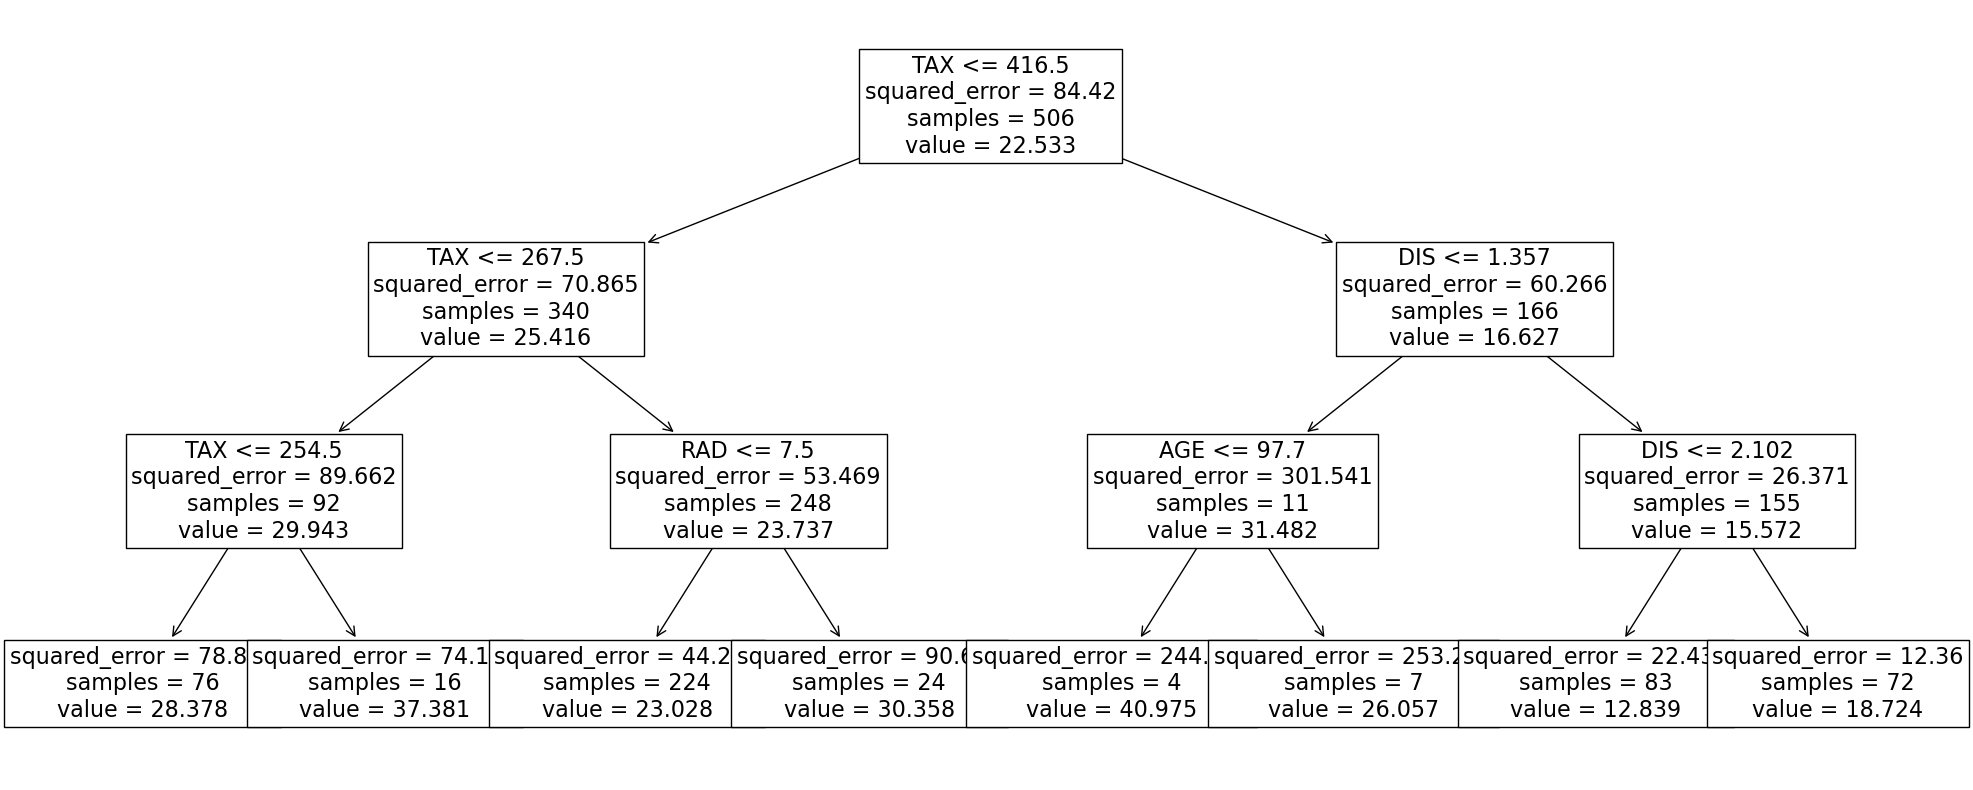

In [4]:
d = load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
y = pd.Series(d['target'])
X = df[['AGE', 'RAD', 'TAX', 'DIS']]
 
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)
fig = plt.figure(figsize=(25, 10))
plot_tree(tree_model, feature_names=X.columns, fontsize =16)
plt.show()

In [5]:
print(X.iloc[0])
print(tree_model.predict(X.iloc[0:1]))

AGE     65.20
RAD      1.00
TAX    296.00
DIS      4.09
Name: 0, dtype: float64
[23.02767857]


In [12]:
explainer_int = shap.TreeExplainer(tree_model,X)
shap_values_int = explainer_int.shap_values(X.iloc[0])
print(shap_values_int)
print(explainer_int.expected_value)

[ 0.         -0.98963831  0.71484754  0.33656659]
22.965903204295884


In [13]:
import shap
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X.iloc[0])
print(shap_values)
print(explainer.expected_value)

[ 0.06879117 -0.52855862  0.64504374  0.30959596]
[22.53280632]
